Training data shape: (60000, 784)
Test data shape: (10000, 784)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 92.58%


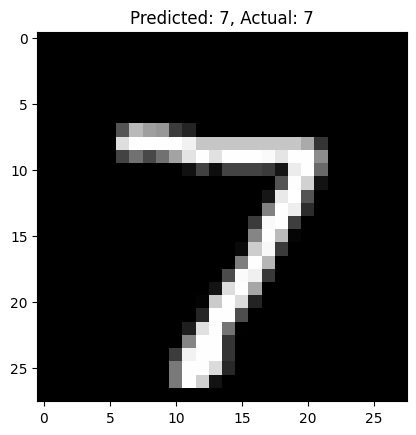

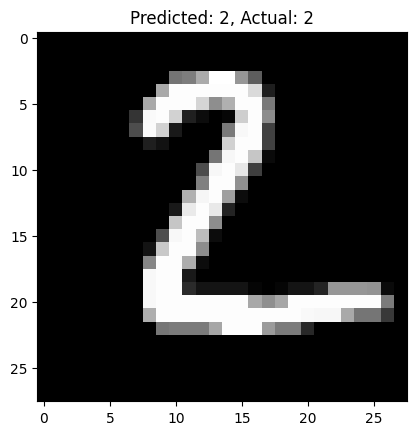

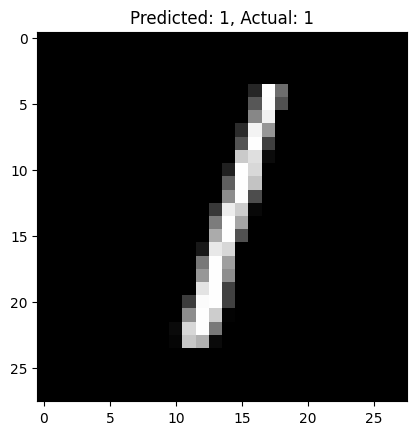

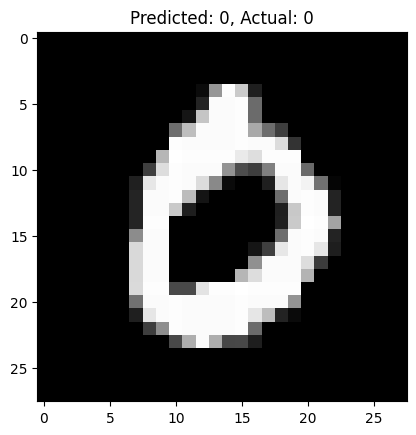

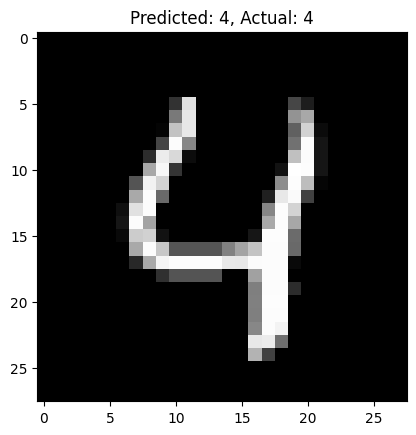

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train_flattened = X_train.reshape(X_train.shape[0], -1) 
X_test_flattened = X_test.reshape(X_test.shape[0], -1)     
X_train_flattened = X_train_flattened / 255.0
X_test_flattened = X_test_flattened / 255.0
print(f"Training data shape: {X_train_flattened.shape}")
print(f"Test data shape: {X_test_flattened.shape}")
logistic_model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
logistic_model.fit(X_train_flattened, y_train)
import joblib
joblib.dump(logistic_model, 'logistic_regression_mnist.pkl')
y_pred = logistic_model.predict(X_test_flattened)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
for i in range(5):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
    plt.show()

In [ ]:
import os
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from torch.utils.data import Dataset, DataLoader
from transformers import AdamW, get_scheduler

corpus_path = '/content/New Text Document.txt'
with open(corpus_path, 'r', encoding='utf-8') as f:
    text = f.read()
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token
input_ids = tokenizer(text, return_tensors="pt", truncation=True, padding=True).input_ids
print(f"Tokenized {len(input_ids)} tokens.")
model = GPT2LMHeadModel.from_pretrained('gpt2')
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
class TextDataset(Dataset):
    def __init__(self, input_ids, block_size):
        self.input_ids = input_ids
        self.block_size = block_size

    def __len__(self):
        return len(self.input_ids) - self.block_size + 1

    def __getitem__(self, idx):
        return self.input_ids[idx: idx + self.block_size]

block_size = 128
block_size = min(block_size, len(input_ids))
dataset = TextDataset(input_ids[0], block_size)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)
optimizer = AdamW(model.parameters(), lr=5e-5)
num_training_steps = len(dataloader) * 3 
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)
model.train()
    for batch in dataloader:
        batch = batch.to(device)
        outputs = model(batch, labels=batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

        print(f"Epoch: {epoch+1}, Loss: {loss.item()}")
model.eval()

prompt = "To be or not to be"
inputs = tokenizer(prompt, return_tensors="pt").input_ids.to(device)
output_sequences = model.generate(
    inputs,
    max_length=200,
    num_return_sequences=1,
    no_repeat_ngram_size=2,
    top_k=50,
    top_p=0.95,
    temperature=0.7
)
generated_text = tokenizer.decode(output_sequences[0], skip_special_tokens=True)
print(generated_text)
Prompt: "To be or not to be"

generated_text: "To be or not to be, that is the question, Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune, Or to take arms against a sea of troubles, And by opposing end them. To die: to sleep; No more; and by a sleep to say we end The heart-ache and the thousand natural shocks That flesh is heir to, 'tis a consummation Devoutly to be wish'd."


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Tokenized 1 tokens.


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 1, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 2, Loss: nan
Epoch: 3, Loss: nan
Epoch: 3, Loss: nan


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpe

Epoch: 3, Loss: nan
To be or not to be, the only thing that matters is that you're a good person.

I'm not saying that I'm a bad person, but I am saying I don't want to become a better person than I already am. I want people to know that they're not alone. They're part of the problem. And I think that's what we need to do. We need people who are willing to take responsibility for themselves. That's the way we're going to get there.


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,418 (286.79 KB)

 Trainable params: 73,418 (286.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 85ms/step - accuracy: 0.2989 - loss: 1.8981 - val_accuracy: 0.4892 - val_loss: 1.4034
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.5191 - loss: 1.3456 - val_accuracy: 0.5556 - val_loss: 1.2451
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.5785 - loss: 1.1921 - val_accuracy: 0.5932 - val_loss: 1.1575
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.6178 - loss: 1.0840 - val_accuracy: 0.6096 - val_loss: 1.1141
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.6520 - loss: 1.0012 - val_accuracy: 0.6605 - val_loss: 0.9914
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.6779 - loss: 0.9327 - val_accuracy: 0.6544 - val_loss: 1.0256
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.6996 - loss: 0.8663 - val_accuracy: 0.6775 - val_loss: 0.9483
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 84ms/step - accuracy: 0.7109 - loss: 0.8294 - 

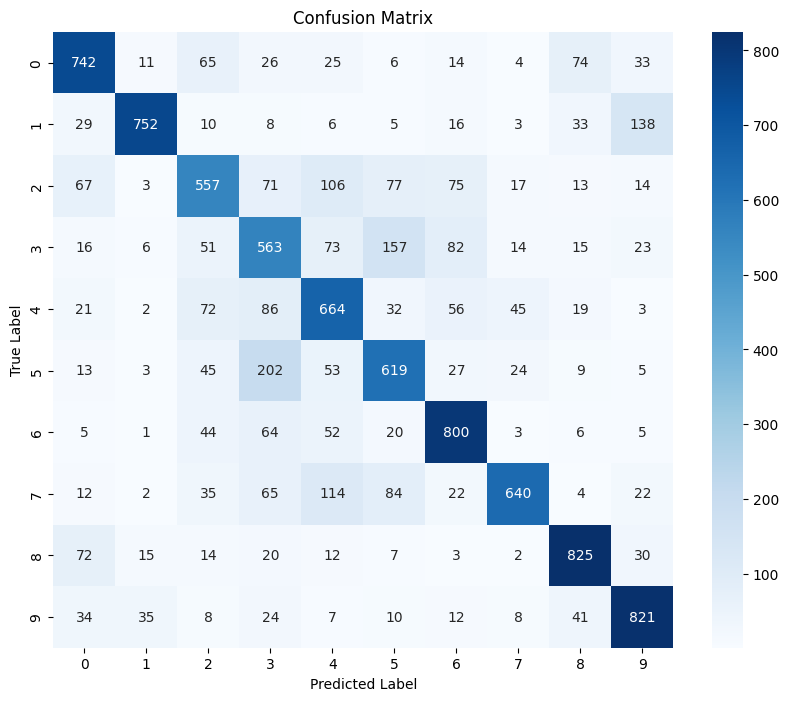

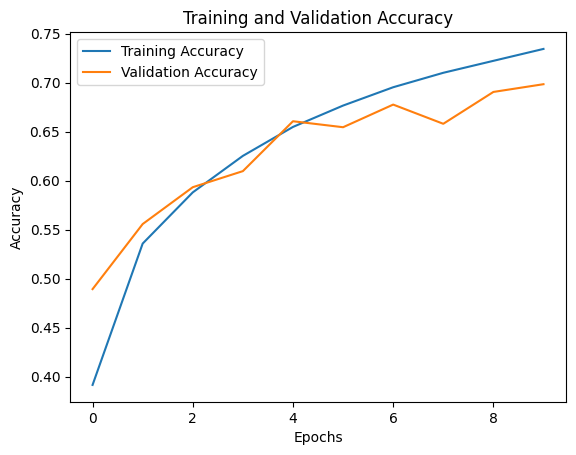

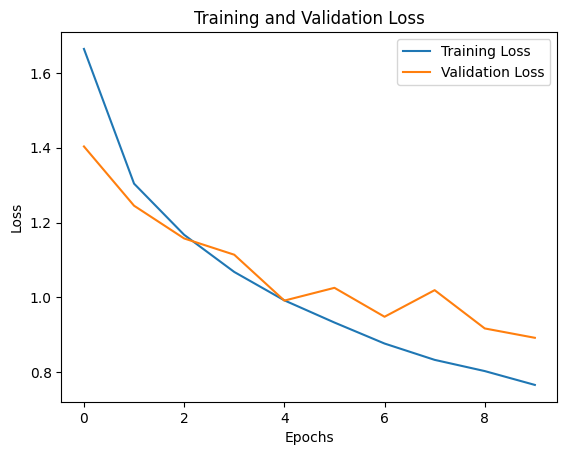

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  
model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
model.save('cnn_cifar10.h5')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()